In [ ]:
# Predicting gender 
# Mostly out of curiosity about how possible it is - there's only a few gaps, I don't think I actually *want* to fill them

In [3]:
%%time
dataset_name = "W19_comb"
df_list = 'BES_reduced_with_na|BES_Panel'
%matplotlib inline
%run BES_header.py {dataset_name} {df_list}
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    

Toggle code

var_type (8079, 14)
Wall time: 1min 5s


In [4]:
pan_dataset_allr_values = pd.read_pickle(BES_small_data_files + "pan_dataset_allr_valuesW19"+".zip",compression='zip')
pan_dataset_ages = pd.read_pickle(BES_small_data_files + "pan_dataset_ages"+".zip", compression='zip')
pan_dataset_votes = pd.read_pickle(BES_small_data_files+"pan_dataset_votes"+".zip",compression='zip')

In [15]:
BES_reduced_with_na["Age_at_W19"] = pan_dataset_ages["Age_at_W19"]
BES_reduced_with_na['EconomicLeft-Right'] = pan_dataset_allr_values['Economic: Left <-> Right{gaussian-ish}complete_fully']
BES_reduced_with_na['SocialLiberalism-Conservatism'] = pan_dataset_allr_values['Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully']

In [7]:
# pan_dataset_allr_values.columns

In [14]:
del BES_reduced_with_na['Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully']

In [8]:
BES_Panel["gender"].isnull().sum()

916

In [17]:
non_nulls = BES_reduced_with_na[BES_Panel["gender"].isnull()].notnull().sum()
non_nulls

turnoutUKGeneralW1__Very likely that I will vote    183
turnoutUKGeneralW2__Very likely that I will vote     22
turnoutUKGeneralW3__Very likely that I will vote    174
turnoutUKGeneralW4__Very likely that I will vote     91
turnoutUKGeneralW5__Very likely that I will vote    109
                                                   ... 
partyContactConW3_Yes                                 1
partyContact1W3_Yes                                   1
Age_at_W19                                          916
EconomicLeft-Right                                  916
SocialLiberalism-Conservatism                       916
Length: 9523, dtype: int64

In [18]:
search(BES_reduced_with_na,"gender")

genderRolesW10__Strongly agree    29674
impGenderW14__Very important       7462
gender_Female                     96090
dtype: int64

In [19]:
treatment_dict = {}

[16:29:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.497493
Will train until validation_0-rmse hasn't improved in 50.7 rounds.
[1]	validation_0-rmse:0.495225
[2]	validation_0-rmse:0.493023
[3]	validation_0-rmse:0.490882
[4]	validation_0-rmse:0.489148
[5]	validation_0-rmse:0.487249
[6]	validation_0-rmse:0.485611
[7]	validation_0-rmse:0.484121
[8]	validation_0-rmse:0.482486
[9]	validation_0-rmse:0.480958
[10]	validation_0-rmse:0.479548
[11]	validation_0-rmse:0.478248
[12]	validation_0-rmse:0.477027
[13]	validation_0-rmse:0.475876
[14]	validation_0-rmse:0.474838
[15]	validation_0-rmse:0.473752
[16]	validation_0-rmse:0.472688
[17]	validation_0-rmse:0.471652
[18]	validation_0-rmse:0.470614
[19]	validation_0-rmse:0.469565
[20]	validation_0-rmse:0.46873
[21]	validation_0-rmse:0.467855
[22]	validation_0-rmse:0.466844
[23]	validation_0-rmse:0.466058
[24]	validation_0-rmse:0.465267
[25]	validation_0-rmse:0.464

[247]	validation_0-rmse:0.427693
[248]	validation_0-rmse:0.427658
[249]	validation_0-rmse:0.427619
[250]	validation_0-rmse:0.427575
[251]	validation_0-rmse:0.427526
[252]	validation_0-rmse:0.427481
[253]	validation_0-rmse:0.427449
[254]	validation_0-rmse:0.427424
[255]	validation_0-rmse:0.427387
[256]	validation_0-rmse:0.427362
[257]	validation_0-rmse:0.427312
[258]	validation_0-rmse:0.4273
[259]	validation_0-rmse:0.427258
[260]	validation_0-rmse:0.427205
[261]	validation_0-rmse:0.427165
[262]	validation_0-rmse:0.427131
[263]	validation_0-rmse:0.427108
[264]	validation_0-rmse:0.427072
[265]	validation_0-rmse:0.427003
[266]	validation_0-rmse:0.426978
[267]	validation_0-rmse:0.42695
[268]	validation_0-rmse:0.426903
[269]	validation_0-rmse:0.426865
[270]	validation_0-rmse:0.426819
[271]	validation_0-rmse:0.426807
[272]	validation_0-rmse:0.426774
[273]	validation_0-rmse:0.426738
[274]	validation_0-rmse:0.426683
[275]	validation_0-rmse:0.426636
[276]	validation_0-rmse:0.426599
[277]	validat

[497]	validation_0-rmse:0.421994
[498]	validation_0-rmse:0.421991
[499]	validation_0-rmse:0.421975
[500]	validation_0-rmse:0.42197
[501]	validation_0-rmse:0.421935
[502]	validation_0-rmse:0.421914
[503]	validation_0-rmse:0.421888
[504]	validation_0-rmse:0.421885
[505]	validation_0-rmse:0.421872
[506]	validation_0-rmse:0.421873
MSE: 0.18, MAE: 0.38, EV: 0.29, R2: 0.28
[16:51:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


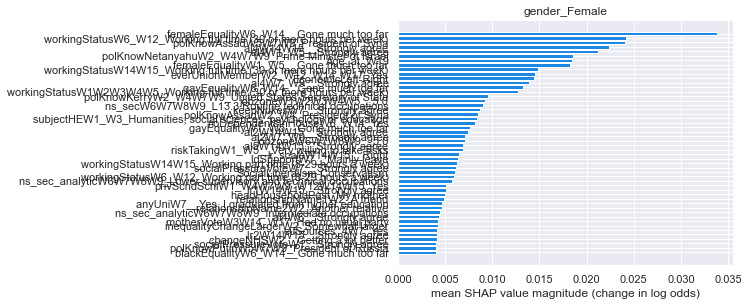

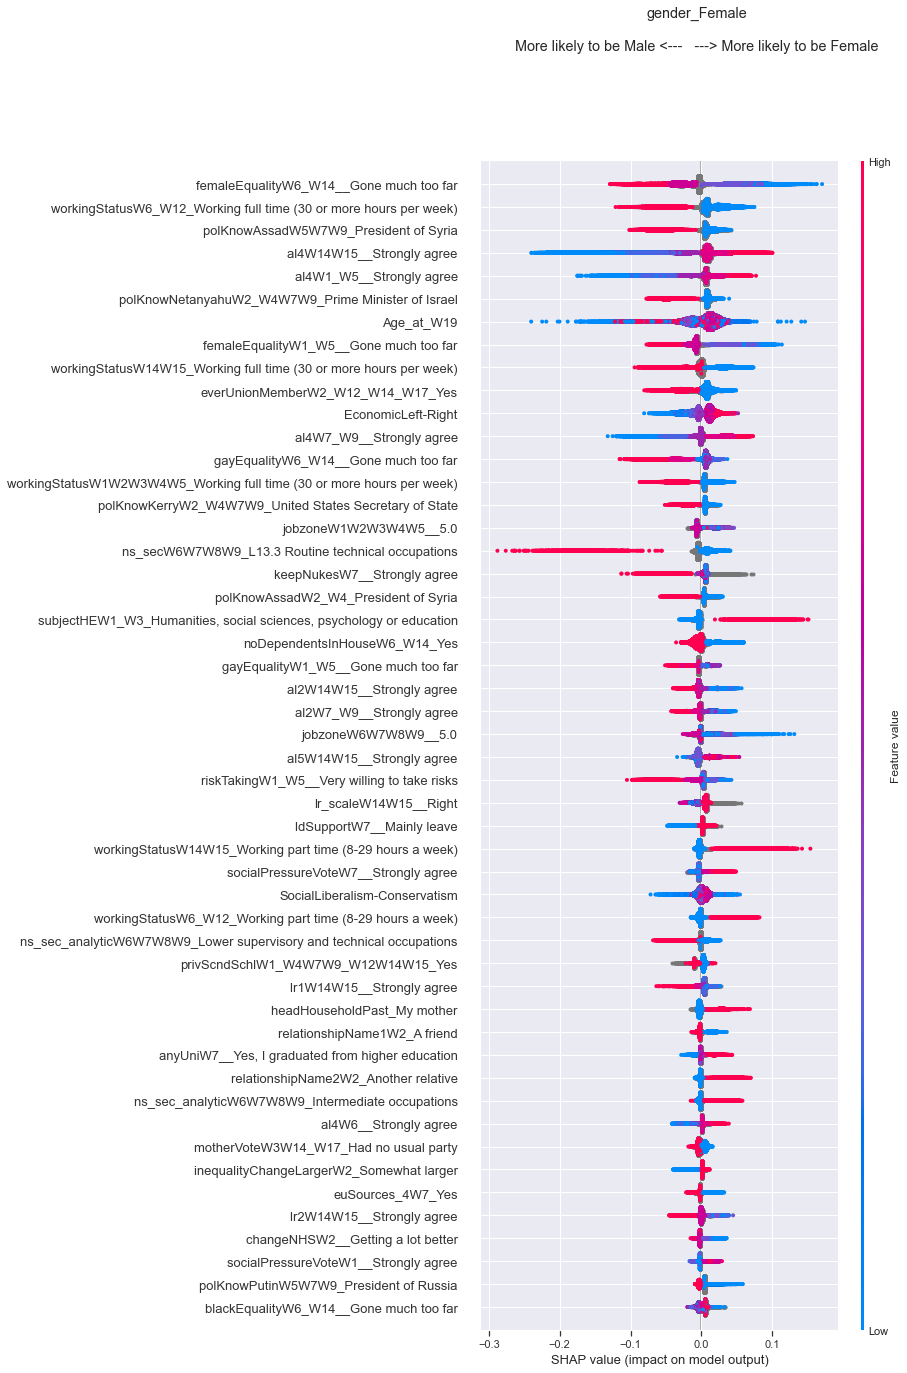

Wall time: 1h 22min 51s


In [119]:
%%time

Treatment = "predicted_gender"
var1 = "gender_Female"
# lr_pan_data_col = pan_dataset_allr_values.columns[2]
# BES_reduced_with_na[var1]= pan_dataset_allr_values[ lr_pan_data_col ]

base = "harm_values_lr"

temp_mask = BES_reduced_with_na[var1].notnull()

predictors = list( non_nulls[non_nulls>2].index )
predictors.append(var1)

var_list = [var1]
var_stub_list = [var1]


(explainer, shap_values, train_columns, alg) = xgboost_run(subdir=Treatment,
           dataset=BES_reduced_with_na[predictors][temp_mask],var_list=var_list,var_stub_list=var_stub_list,
           min_features = min(BES_reduced_with_na.shape[1]-1,50),
           title = var1+"\n\nMore likely to be Male <---   ---> More likely to be Female", Treatment=Treatment,
           use_mean_weights=True)
treatment_dict[Treatment] = shap_array(shap_values, train_columns, threshold = .1, min_features = 50)

In [120]:
# %debug

In [ ]:
# def xgboost_run(title, dataset, var_list,var_stub_list=[], subdir=None, min_features=30, dependence_plots=False , output_folder=".."+os.sep+"Output"+os.sep,Treatment="default",
#                 use_mean_weights=False):
#     # for target_var,base_var in zip(var_list,base_list):
#     treatment_subfolder = create_subdir(output_folder,Treatment)

#     for target_var in var_list:
#         if sample_wts:
#             wave_no = get_wave_no( target_var )
#             weight_var = num_to_weight[wave_no]    
#             print( target_var, wave_no )

#         target = create_target(dataset,target_var)
#         mask   = target.notnull()
#         if optional_mask & sample_wts:
#             mask = mask&optional_mask_fn(wave_no)
#         else:
#             mask = mask&optional_mask_fn()
#         target = target[mask]

#         if sum(mask) < minimum_sample:
#             continue

#         train = create_train(dataset,drop_other_waves,var_stub_list,mask)

#         if subdir is None:
#             output_subfolder = create_subdir(treatment_subfolder,target_var)
#         else:
#             output_subfolder = create_subdir(treatment_subfolder,subdir)

#         if sample_wts:
#             sample_weights = weights[weight_var][mask]
#             print("missing vals in sample weights: "+ str( sample_weights.isnull().sum() ) )
#             sample_weights = sample_weights.fillna(sample_weights.median())
#         elif use_mean_weights:
#             weight_vars = list(search(BES_Panel,"(wt_new_W\d+|wt_full_W\d)($|_result)").index)
#             sample_weights = BES_Panel[weight_vars].mean(axis=1)
#             sample_weights = sample_weights.fillna(sample_weights.median())
#             sample_weights = sample_weights.loc[mask[mask].index]
#             sample_weights.name = "sample_weights"
#         else:
#             sample_weights = None
#     #         get_non_overfit_settings( train, target, alg, seed, early_stoppping_fraction, test_size, sample_weights )
#     #         # fit to full dataset at non-overfitting level
#     #         alg.fit(train, target, verbose = True, sample_weight = sample_weights)        
#     #     else:

#         get_non_overfit_settings( train, target, alg, seed, early_stoppping_fraction, test_size, eval_metric, verbose = True,
#                                   sample_weights=sample_weights )
#         # fit to full dataset at non-overfitting level
#         alg.fit(train, target, verbose = True, sample_weight = sample_weights)


#     #################

#         explainer = shap.TreeExplainer(alg)
#         shap_values = explainer.shap_values(train)
        
# #         shap_values = shap.TreeExplainer(alg).shap_values(train);

#         shap_problem = np.isnan(np.abs(shap_values).mean(0)).any()
#         if shap_problem:
#             print("hit problem!")
#             shap_values = shap.TreeExplainer(alg).shap_values(train, approximate=True);

#         shap_outputs(shap_values, train, target_var, output_subfolder, threshold = .1,
#                      min_features = min_features, title=title,
#                      dependence_plots=dependence_plots)
        
#     return (explainer, shap_values, train.columns, alg)

# def get_non_overfit_settings( train, target, alg, seed, early_stoppping_fraction, test_size, eval_metric, verbose = True,
#                               sample_weights = None ):

#     if sample_weights is not None:

#         X_train, X_test, y_train, y_test = train_test_split( pd.concat( [train,sample_weights], axis=1 ),
#                                                              target, test_size=test_size,
#                                                              random_state=seed, stratify=pd.qcut( pd.Series( target ),
#                                                                                                   q=10,
#                                                                                                   duplicates = 'drop',
#                                                                                                 ).cat.codes )

#         eval_set = [(X_test, y_test)]
#         weight_var = sample_weights.name
#         sample_weight = X_train[weight_var].values
#         sample_weight_eval_set = X_test[weight_var].values
#         X_train.drop(weight_var, axis=1, inplace=True)
#         X_test.drop(weight_var, axis=1, inplace=True)

#         alg.fit(X_train, y_train, eval_metric=eval_metric, 
#                 early_stopping_rounds = alg.get_params()['n_estimators']*early_stoppping_fraction,
#                 eval_set=eval_set, verbose=True, sample_weight = sample_weight)
        
#     else:
#         X_train, X_test, y_train, y_test = train_test_split( train,
#                                                              target, test_size=test_size,
#                                                              random_state=seed, stratify=pd.qcut( pd.Series( target ),
#                                                                                                   q=10,
#                                                                                                   duplicates = 'drop',
#                                                                                                 ).cat.codes )
          
            

#         eval_set = [(X_test, y_test)]

#         alg.fit(X_train, y_train, eval_metric=eval_metric, 
#                 early_stopping_rounds = alg.get_params()['n_estimators']*early_stoppping_fraction,
#                 eval_set=eval_set, verbose=True )        
        

#     # make predictions for test data
#     predictions = alg.predict(X_test)

#     # evaluate predictions
#     MSE = mean_squared_error(y_test, predictions)
#     MAE = mean_absolute_error(y_test, predictions)
#     EV = explained_variance_score(y_test, predictions)
#     R2 = r2_score(y_test, predictions)

#     print("MSE: %.2f, MAE: %.2f, EV: %.2f, R2: %.2f" % (MSE, MAE, EV, R2) )
#     alg.set_params(n_estimators=alg.best_iteration)   

In [ ]:
# def xgboost_run(title, dataset, var_list,var_stub_list=[], subdir=None, min_features=30, dependence_plots=False , output_folder=".."+os.sep+"Output"+os.sep,Treatment="default",
#                 use_mean_weights=False):
#     # for target_var,base_var in zip(var_list,base_list):
#     treatment_subfolder = create_subdir(output_folder,Treatment)

#     for target_var in var_list:
#         if sample_wts:
#             wave_no = get_wave_no( target_var )
#             weight_var = num_to_weight[wave_no]    
#             print( target_var, wave_no )

#         target = create_target(dataset,target_var)
#         mask   = target.notnull()
#         if optional_mask & sample_wts:
#             mask = mask&optional_mask_fn(wave_no)
#         else:
#             mask = mask&optional_mask_fn()
#         target = target[mask]

#         if sum(mask) < minimum_sample:
#             continue

#         train = create_train(dataset,drop_other_waves,var_stub_list,mask)

#         if subdir is None:
#             output_subfolder = create_subdir(treatment_subfolder,target_var)
#         else:
#             output_subfolder = create_subdir(treatment_subfolder,subdir)

#         if sample_wts:
#             sample_weights = weights[weight_var][mask]
#             print("missing vals in sample weights: "+ str( sample_weights.isnull().sum() ) )
#             sample_weights = sample_weights.fillna(sample_weights.median())
#         elif use_mean_weights:
#             weight_vars = list(search(BES_Panel,"(wt_new_W\d+|wt_full_W\d)($|_result)").index)
#             sample_weights = BES_Panel[weight_vars].mean(axis=1)
#             sample_weights = sample_weights.fillna(sample_weights.median())
#             sample_weights = sample_weights.loc[mask[mask].index]
#         else:
#             sample_weights = None
#     #         get_non_overfit_settings( train, target, alg, seed, early_stoppping_fraction, test_size, sample_weights )
#     #         # fit to full dataset at non-overfitting level
#     #         alg.fit(train, target, verbose = True, sample_weight = sample_weights)        
#     #     else:

#         get_non_overfit_settings( train, target, alg, seed, early_stoppping_fraction, test_size, eval_metric, verbose = True,
#                                   sample_weights=sample_weights )
#         # fit to full dataset at non-overfitting level
#         alg.fit(train, target, verbose = True, sample_weight = sample_weights)


#     #################

#         explainer = shap.TreeExplainer(alg)
#         shap_values = explainer.shap_values(train)
        
# #         shap_values = shap.TreeExplainer(alg).shap_values(train);

#         shap_problem = np.isnan(np.abs(shap_values).mean(0)).any()
#         if shap_problem:
#             print("hit problem!")
#             shap_values = shap.TreeExplainer(alg).shap_values(train, approximate=True);

#         shap_outputs(shap_values, train, target_var, output_subfolder, threshold = .1,
#                      min_features = min_features, title=title,
#                      dependence_plots=dependence_plots)
        
#     return (explainer, shap_values, train.columns, alg)

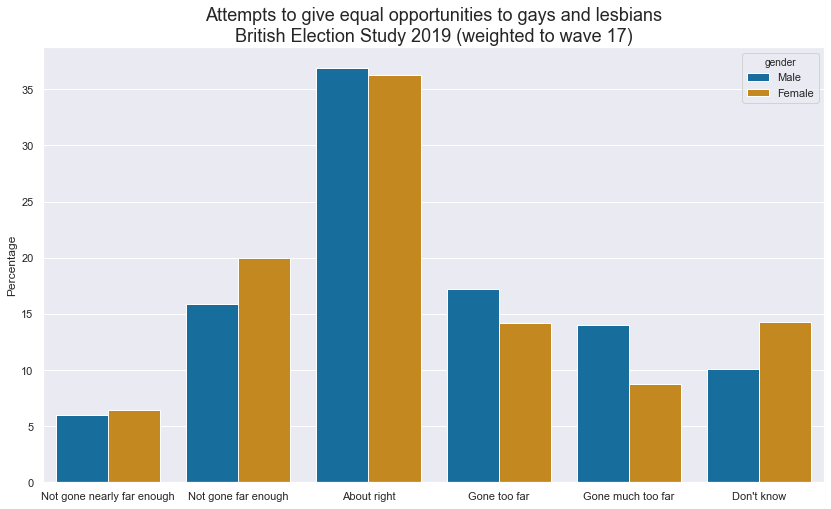

In [42]:
ques = "Attempts to give equal opportunities to gays and lesbians"

df = pd.crosstab(BES_Panel["gender"],BES_Panel["gayEqualityW17"],
            values=BES_Panel["wt_new_W17"],aggfunc=sum,normalize='index').stack().reset_index()
df.columns = ["gender",ques,"Percentage"]
df["Percentage"]=df["Percentage"]*100
plt.figure(figsize=(14,8))
sns.barplot(data=df,x=ques,y="Percentage",hue="gender");
plt.title(ques+"\nBritish Election Study 2019 (weighted to wave 17)",fontsize=18);
plt.xlabel("");

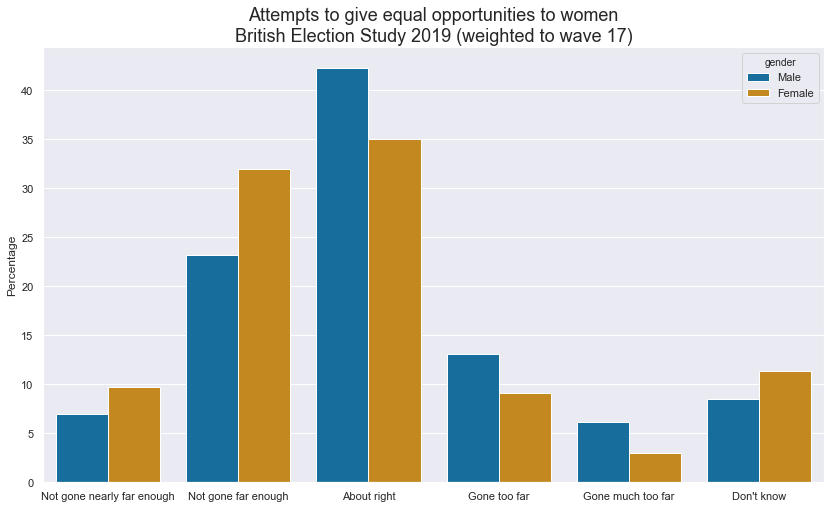

In [41]:
ques = "Attempts to give equal opportunities to women"

df = pd.crosstab(BES_Panel["gender"],BES_Panel["femaleEqualityW17"],
            values=BES_Panel["wt_new_W17"],aggfunc=sum,normalize='index').stack().reset_index()
df.columns = ["gender",ques,"Percentage"]
df["Percentage"]=df["Percentage"]*100
plt.figure(figsize=(14,8))
sns.barplot(data=df,x=ques,y="Percentage",hue="gender");
plt.title(ques+"\nBritish Election Study 2019 (weighted to wave 17)",fontsize=18);
plt.xlabel("");

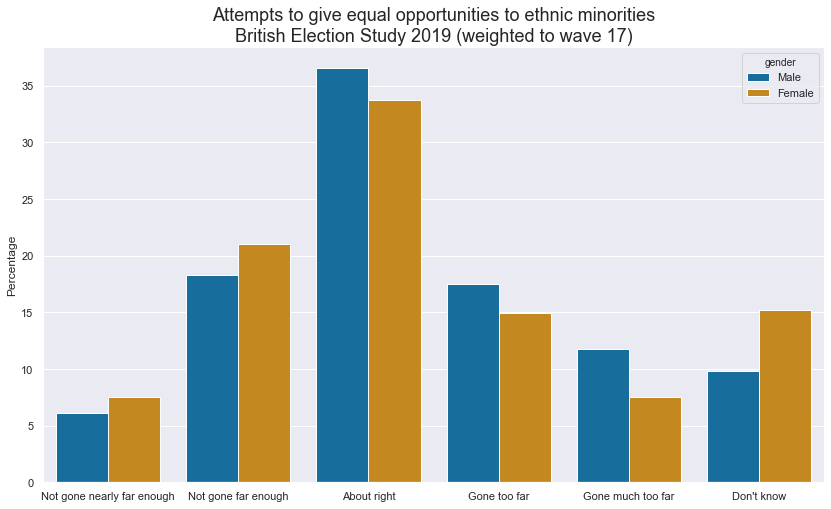

In [40]:
ques = "Attempts to give equal opportunities to ethnic minorities"

df = pd.crosstab(BES_Panel["gender"],BES_Panel["blackEqualityW17"],
            values=BES_Panel["wt_new_W17"],aggfunc=sum,normalize='index').stack().reset_index()
df.columns = ["gender",ques,"Percentage"]
df["Percentage"]=df["Percentage"]*100
plt.figure(figsize=(14,8))
sns.barplot(data=df,x=ques,y="Percentage",hue="gender");
plt.title(ques+"\nBritish Election Study 2019 (weighted to wave 17)",fontsize=18);
plt.xlabel("");

In [21]:
search(BES_Panel,"leftRight")

leftRightW1     30539
leftRightW2     30261
leftRightW3     27828
leftRightW4     31549
leftRightW5     30970
leftRightW6     30258
leftRightW7     30895
leftRightW8      6053
leftRightW9      7442
leftRightW10    30237
leftRightW11    30956
leftRightW12    34394
leftRightW13    31136
leftRightW14    31063
leftRightW15    30842
leftRightW16    37959
leftRightW17    34366
leftRightW18    37825
leftRightW19    32177
dtype: int64

In [22]:
BES_Panel["leftRightW19"]

id
1               NaN
2                 7
3                 4
4               NaN
5               NaN
            ...    
98447           NaN
98448           NaN
98449    Don't know
98450           NaN
98451           NaN
Name: leftRightW19, Length: 97006, dtype: category
Categories (12, object): [Left < 1 < 2 < 3 ... 8 < 9 < Right < Don't know]

In [29]:
round_ages = pan_dataset_ages["Age_at_W19"].apply(lambda x: np.floor(x))
round_ages[round_ages>25] = np.nan
pd.crosstab(round_ages,BES_Panel["leftRightW19"])

leftRightW19,Left,1,2,3,4,5,6,7,8,9,Right,Don't know
Age_at_W19,,,,,,,,,,,,
18.0,8,5,16,14,7,9,2,12,5,1,0,31
19.0,13,8,11,26,13,12,9,12,4,1,3,30
20.0,14,7,38,31,13,19,11,14,5,5,2,44
21.0,19,11,47,33,25,25,16,20,13,3,3,33
22.0,23,17,35,44,26,26,20,12,7,3,3,57
23.0,13,19,30,50,35,33,18,14,5,3,5,51
24.0,9,14,29,40,23,31,18,13,4,3,3,66
25.0,7,9,22,48,23,21,18,22,9,0,7,49


In [32]:
pd.crosstab(pan_dataset_ages["equalisedAgeGroup_at_W19_detailed"],BES_Panel["gender"])

gender,Male,Female
equalisedAgeGroup_at_W19_detailed,,
"(17.0, 24.0]",2695,3862
"(24.0, 28.0]",2766,4157
"(28.0, 33.0]",2550,4372
"(33.0, 37.0]",2430,4018
"(37.0, 41.0]",2841,4083
"(41.0, 46.0]",3092,3830
"(46.0, 50.0]",3039,3889
"(50.0, 55.0]",3255,3663
"(55.0, 59.0]",3263,3662


In [74]:
pd.crosstab(pan_dataset_ages["equalisedAgeGroup_at_W19_detailed"],BES_Panel["gender"],
            values=BES_Panel["wt_new_W17"],aggfunc=sum)

gender,Male,Female
equalisedAgeGroup_at_W19_detailed,,
"(17.0, 24.0]",1797.684523,1751.045683
"(24.0, 28.0]",684.402888,1000.147582
"(28.0, 33.0]",954.542379,1264.971660
"(33.0, 37.0]",1057.599046,1325.431661
"(37.0, 41.0]",1419.568685,1399.195505
"(41.0, 46.0]",1676.252463,1296.218285
"(46.0, 50.0]",1762.693181,1491.182346
"(50.0, 55.0]",1097.658090,1156.490089
"(55.0, 59.0]",1170.182843,1264.570868


In [31]:
pan_dataset_ages.columns

Index(['Age_at_W1_rounded', 'Age_at_W1', 'Age_at_W2', 'Age_at_W3', 'Age_at_W4',
       'Age_at_W5', 'Age_at_W6', 'Age_at_W7', 'Age_at_W8', 'Age_at_W9',
       'Age_at_W10', 'Age_at_W11', 'Age_at_W12', 'Age_at_W13', 'Age_at_W14',
       'Age_at_W15', 'Age_at_W16', 'Age_at_W17', 'Age_at_W18', 'Age_at_W19',
       'standardAgeGroup_at_W1', 'equalisedAgeGroup_at_W1',
       'equalisedAgeGroup_at_W1_detailed', 'equalLengthAgeGroup_at_W1',
       'standardAgeGroup_at_W19', 'equalisedAgeGroup_at_W19',
       'equalisedAgeGroup_at_W19_detailed', 'equalLengthAgeGroup_at_W19',
       'rough_predictions', 'Age_at_W1_missing_values'],
      dtype='object')

In [35]:
pd.crosstab(BES_Panel["gender"],BES_Panel["gender"],values=BES_Panel["wt_new_W8"],aggfunc=sum)

gender,Male,Female
gender,,
Male,16244.376119,NaN
Female,NaN,17255.61299


In [107]:
weight_vars = list(search(BES_Panel,"(wt_new_W\d+|wt_full_W\d)($|_result)").index)
mean_weights = BES_Panel[weight_vars].mean(axis=1)
mean_weights = mean_weights.fillna(mean_weights.median())
# weight_vars.remove(["wt_full_"])

In [64]:
# mean_weights.isnull().sum()

In [48]:
search(BES_Panel,"(wt_new_W\d+|wt_full_W\d)($|_result)")

wt_new_W10           30237
wt_new_W11           30956
wt_new_W14           31063
wt_new_W15           30842
wt_new_W16           37959
wt_new_W18           37825
wt_new_W12           34394
wt_new_W13_result    31135
wt_new_W17           34366
wt_new_W19_result    32177
wt_new_W9            30036
wt_new_W8            33502
wt_new_W7            30895
wt_new_W6            30073
wt_full_W3           27839
wt_full_W4           31328
wt_full_W5           30725
wt_full_W1           30235
wt_full_W2           30211
dtype: int64

In [78]:
BES_Panel[search(BES_Panel,"wt_(new|full)").index].notnull().any(axis=1).sum()

96184

In [51]:
BES_Panel[search(BES_Panel,"wave\d+").index][BES_Panel[weight_vars].mean(axis=1).isnull()].sum()

wave1     205.0
wave2      21.0
wave3       0.0
wave4     107.0
wave5     137.0
wave6     107.0
wave7      14.0
wave8       0.0
wave9       0.0
wave10      0.0
wave11      0.0
wave12      0.0
wave13      1.0
wave14      0.0
wave15      0.0
wave16      0.0
wave17      0.0
wave18      0.0
wave19      0.0
dtype: float64

In [34]:
16657.863426/17702.055432

0.9410129512919491

In [36]:
16244.376119/17255.61299

0.9413966416848805

In [70]:
pd.crosstab(BES_Panel["gender"],BES_Panel["gender"],values=mean_weights,aggfunc=sum)

gender,Male,Female
gender,,
Male,49426.367707,NaN
Female,NaN,53199.11411


In [58]:
51399.308579/55169.332005

0.9316645083602186

In [71]:
49426.367707/53199.11411

0.929082533306869

In [84]:
pan_dataset_allr_values

,Economic: Left(0) <-> Right(200){uniform},Social: Liberalism(0) <-> Conservatism(200){uniform},Economic: Left <-> Right{gaussian-ish},Social: Liberalism <-> Conservatism{gaussian-ish},Economic: Left <-> Right{gaussian-ish}completish,Economic: Left <-> Right{gaussian-ish}complete,Social: Liberalism <-> Conservatism{gaussian-ish}completish,Social: Liberalism <-> Conservatism{gaussian-ish}complete,Economic: Left <-> Right{gaussian-ish}complete_fully,Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully
id,,,,,,,,,,
1,6.0,183.0,-1.913311,1.379564,-1.913311,-1.913311,1.379564,1.379564,-1.913311,1.379564
2,195.0,54.0,1.929016,-0.648342,1.929016,1.929016,-0.648342,-0.648342,1.929016,-0.648342
3,74.0,116.0,-0.313073,0.242132,-0.313073,-0.313073,0.242132,0.242132,-0.313073,0.242132
4,149.0,132.0,0.643054,0.470176,0.643054,0.643054,0.470176,0.470176,0.643054,0.470176
5,169.0,99.0,1.004469,0.012041,1.004469,1.004469,0.012041,0.012041,1.004469,0.012041
...,...,...,...,...,...,...,...,...,...,...
98447,118.0,57.0,0.217387,-0.585382,0.217387,0.217387,-0.585382,-0.585382,0.217387,-0.585382
98448,159.0,23.0,0.791833,-1.276719,0.791833,0.791833,-1.276719,-1.276719,0.791833,-1.276719
98449,42.0,49.0,-0.789732,-0.721598,-0.789732,-0.789732,-0.721598,-0.721598,-0.789732,-0.721598


In [92]:
lr_col = pan_dataset_allr_values.columns[8]
al_col = pan_dataset_allr_values.columns[9]

mask = BES_Panel["wt_new_W19_result"].notnull()

In [93]:

al = weighted_qcut(pan_dataset_allr_values[al_col][mask],BES_Panel["wt_new_W19_result"][mask],3 )
al.name = 'Social Liberal-Authoritarian'
al = al.cat.rename_categories(["Liberal","Moderate","Authoritarian"])

lr = weighted_qcut(pan_dataset_allr_values[lr_col][mask],BES_Panel["wt_new_W19_result"][mask],3 )
lr.name = 'Economic Left-Right'
lr = lr.cat.rename_categories(["Left","Centre","Right"])

df = pd.concat([al,lr],axis=1).apply(lambda x: x[lr.name]+"-"+x[al.name],axis=1).astype('category')
df = df.cat.reorder_categories([ 'Left-Liberal', 'Left-Moderate','Left-Authoritarian',
    'Centre-Liberal', 'Centre-Moderate','Centre-Authoritarian',
        'Right-Liberal', 'Right-Moderate','Right-Authoritarian',])

In [96]:
df = pd.concat([al,lr],axis=1).apply(lambda x: x[lr.name]+"-"+x[al.name],axis=1).astype('category')
df = df.cat.reorder_categories([ 'Left-Liberal', 'Left-Moderate','Left-Authoritarian',
    'Centre-Liberal', 'Centre-Moderate','Centre-Authoritarian',
        'Right-Liberal', 'Right-Moderate','Right-Authoritarian',])

ct = pd.crosstab(index=pan_dataset_votes["2016EUVote_complete"][mask],
             columns=df,
             values=BES_Panel["wt_new_W19_result"][mask],
             aggfunc=sum, normalize = 'columns')*100

In [98]:
ct.round(2)

col_0,Left-Liberal,Left-Moderate,Left-Authoritarian,Centre-Liberal,Centre-Moderate,Centre-Authoritarian,Right-Liberal,Right-Moderate,Right-Authoritarian
2016EUVote_complete,,,,,,,,,
DK,0.05,0.00,0.03,0.00,0.29,0.09,0.14,0.09,0.00
LEAVE,14.64,38.86,62.05,21.77,38.22,60.23,30.54,46.52,65.20
REMAIN,67.45,39.05,22.63,57.34,35.23,22.82,48.82,32.56,23.94
DNV,11.39,16.33,13.64,12.91,18.72,14.04,13.87,14.90,8.49
TYTV(Def),5.70,4.36,0.90,6.87,5.48,2.01,5.43,4.43,1.50
TYTV(Maybe),0.09,0.00,0.00,0.00,0.18,0.00,0.14,0.00,0.00
UNK,0.68,1.40,0.75,1.12,1.88,0.81,1.05,1.50,0.87


In [103]:
df = pd.concat([al,lr],axis=1).apply(lambda x: x[lr.name]+"-"+x[al.name],axis=1).astype('category')
df = df.cat.reorder_categories([ 'Left-Liberal', 'Left-Moderate','Left-Authoritarian',
    'Centre-Liberal', 'Centre-Moderate','Centre-Authoritarian',
        'Right-Liberal', 'Right-Moderate','Right-Authoritarian',])

ct = pd.crosstab(index=pan_dataset_votes["2019GEVote_complete"][mask],
             columns=df,
             values=BES_Panel["wt_new_W19_result"][mask],
             aggfunc=sum, normalize = 'columns')*100
ct.round(2)

col_0,Left-Liberal,Left-Moderate,Left-Authoritarian,Centre-Liberal,Centre-Moderate,Centre-Authoritarian,Right-Liberal,Right-Moderate,Right-Authoritarian
2019GEVote_complete,,,,,,,,,
BXP,0.62,1.58,3.58,0.44,1.60,2.57,0.59,1.08,1.67
CON,6.15,21.68,36.76,14.57,28.09,46.91,33.02,48.56,68.37
DK,0.44,1.26,1.33,1.02,1.85,1.54,0.95,1.08,0.88
GP,3.06,2.09,1.62,2.48,1.76,1.10,3.06,1.55,0.93
LAB,55.23,32.66,21.11,41.12,22.52,13.57,19.19,13.22,6.07
LD,11.23,8.66,5.02,13.42,7.72,4.98,17.06,7.90,5.46
OTH,1.04,1.26,1.09,0.90,0.98,0.94,0.95,0.95,0.85
PC,0.62,0.28,0.21,0.46,0.63,0.42,0.41,0.26,0.19
SNP,6.78,3.71,3.19,3.67,2.71,2.04,2.11,1.56,0.98


In [104]:
df = pd.concat([al,lr],axis=1).apply(lambda x: x[lr.name]+"-"+x[al.name],axis=1).astype('category')
df = df.cat.reorder_categories([ 'Left-Liberal', 'Left-Moderate','Left-Authoritarian',
    'Centre-Liberal', 'Centre-Moderate','Centre-Authoritarian',
        'Right-Liberal', 'Right-Moderate','Right-Authoritarian',])

ct = pd.crosstab(index=pan_dataset_votes["2017GEVote_complete"][mask],
             columns=df,
             values=BES_Panel["wt_new_W19_result"][mask],
             aggfunc=sum, normalize = 'columns')*100
ct.round(2)

col_0,Left-Liberal,Left-Moderate,Left-Authoritarian,Centre-Liberal,Centre-Moderate,Centre-Authoritarian,Right-Liberal,Right-Moderate,Right-Authoritarian
2017GEVote_complete,,,,,,,,,
CON,5.39,16.32,27.41,14.31,27.06,42.08,35.84,49.48,67.10
DK,1.54,2.97,1.41,1.56,2.64,2.35,1.37,2.19,1.60
GP,3.12,1.67,1.40,2.41,1.53,0.96,2.29,1.07,0.87
LAB,56.03,39.71,33.78,44.47,27.79,21.66,24.26,15.34,9.93
LD,8.69,5.83,3.85,9.84,5.57,3.93,10.22,4.55,3.08
OTH,1.13,0.97,1.24,1.07,0.73,1.00,0.87,1.08,0.83
PC,0.58,0.31,0.33,0.39,0.35,0.34,0.28,0.16,0.20
SNP,5.90,3.42,2.98,2.59,2.40,1.83,1.67,1.19,0.78
UKIP,0.47,2.35,5.05,0.47,1.61,3.63,0.75,2.05,2.13
